
This video shows the results of unsupervised learning with different type of kezrnel normalization. This is to illustrate the results obtained in this [paper on the An Adaptive Homeostatic Algorithm for the Unsupervised Learning of Visual Features](https://laurentperrinet.github.io/publication/perrinet-19) which is now in press.


<BR>
<center><video controls autoplay loop src="../files/2019-09-11_Perrinet19.mp4" width=61.8%/> </center>
<BR>

<!-- TEASER_END -->


In [1]:
%matplotlib inline

In [8]:
%ls -ltr /tmp/cache_dir

total 966808
-rw-r--r--  1 laurentperrinet  wheel  231154688 Sep 11 18:15 2019-09-11_Perrinet19_data_data.npy
-rw-r--r--  1 laurentperrinet  wheel    5496750 Sep 11 18:16 2019-09-11_Perrinet19_None_0_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:17 2019-09-11_Perrinet19_None_1_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:17 2019-09-11_Perrinet19_None_2_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:18 2019-09-11_Perrinet19_None_3_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:19 2019-09-11_Perrinet19_None_4_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:20 2019-09-11_Perrinet19_None_5_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:20 2019-09-11_Perrinet19_None_6_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:21 2019-09-11_Perrinet19_None_7_dico.pkl
-rw-r--r--  1 laurentperrinet  wheel    5496793 Sep 11 18:22 2019-09-11_Perrinet19_None_8_dico.pkl

In [9]:
%ls -ltr /tmp/2019-09-11*


ls: /tmp/2019-09-11*: No such file or directory


In [4]:
%rm /tmp/cache_dir/*lock* 
#%rm/tmp/2019-09-11*

rm: /tmp/cache_dir/*lock*: No such file or directory


In [94]:
d_new, d_old = 1, 1
N_step = 16
for i_step in range(N_step):
    print(d_new, d_old)
    d_new, d_old = d_new + d_old, d_new

1 1
2 1
3 2
5 3
8 5
13 8
21 13
34 21
55 34
89 55
144 89
233 144
377 233
610 377
987 610
1597 987


In [16]:
%%writefile /tmp/video_abstract.py
#initialize
import os
import numpy as np
np.set_printoptions(precision=2, suppress=True)
seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
#from shl_scripts import sparse_encode
name = '2019-09-11_Perrinet19'

datapath = '/tmp/database'
opts = dict(datapath=datapath, verbose=0, cache_dir='/tmp/cache_dir', n_iter=2**5 + 1, seed=seed)
shl = SHL(**opts)
data = shl.get_data(matname=f'{name}_data')

# running main simulations
# Figure 1 & 3
N_cv = 1
homeo_methods = ['None', 'OLS', 'HEH', 'HAP']

n_jobs = 1
N_step = 12
N_step = 16
    
from shl_scripts import touch
#from shl_scripts.shl_experiments import SHL_set
for homeo_method, color in zip(homeo_methods, colors):
    print(f'=> homeo_method={homeo_method}')
    flockname = os.path.join(shl.cache_dir, f'{name}_{homeo_method}_lock')
    if not os.path.isfile(flockname):
        touch(fmatname + '_lock')
        # TODO use fibonacci
        d_new, d_old = 1, 1
        
        for i_step in range(N_step):

            opts_ = opts.copy()
            n_iter = int(base_iter**i_step + 1)

            print(f'==> i_iter={i_step} / n_iter={d_new}')
            opts_.update(homeo_method=homeo_method, n_iter=d_old,)

            shl = SHL(**opts)
            if i_step==0:
                dictionary = None
            else:
                dictionary = shl.learn_dico(data=data, matname=f'{name}_{homeo_method}_{i_step-1}', list_figures=[]).dictionary

            dico = shl.learn_dico(data=data, dictionary=dictionary, matname=f'{name}_{homeo_method}_{i_step}', list_figures=[])

            d_new, d_old = d_new + d_old, d_new
                          
        if os.path.isfile(flockname): os.remove(flockname)

                          

Overwriting /tmp/video_abstract.py


In [15]:
%run  /tmp/video_abstract.py

SyntaxError: invalid syntax (video_abstract.py, line 32)

<Figure size 432x288 with 0 Axes>

In [69]:
homeo_methods


['None', 'OLS', 'HEH', 'HAP']

In [72]:
phi = (np.sqrt(5) + 1. ) /2
fig_width = 15
dpi_export = 300
#dpi_export = 0
colors = ['black', 'orange', 'blue', 'red']

=> homeo_method=None
==> i_iter=0 / n_iter=2


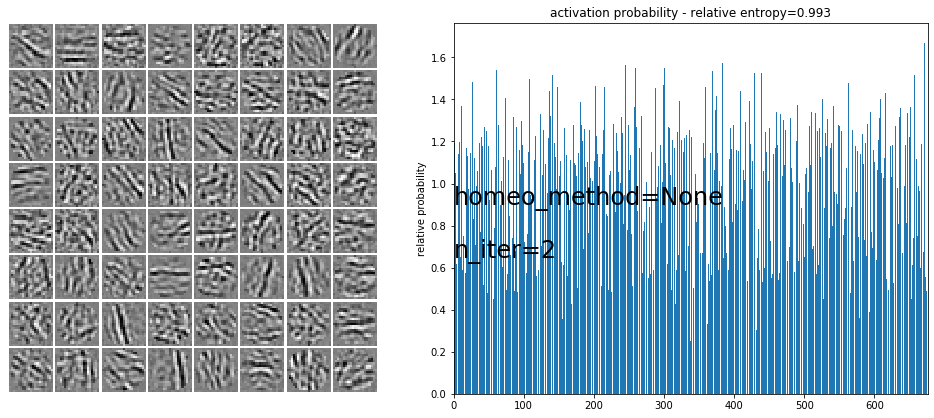

==> i_iter=1 / n_iter=2


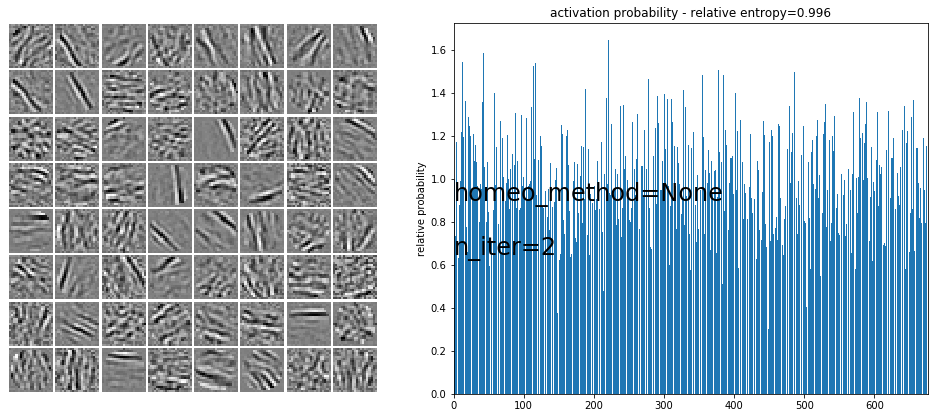

==> i_iter=2 / n_iter=3


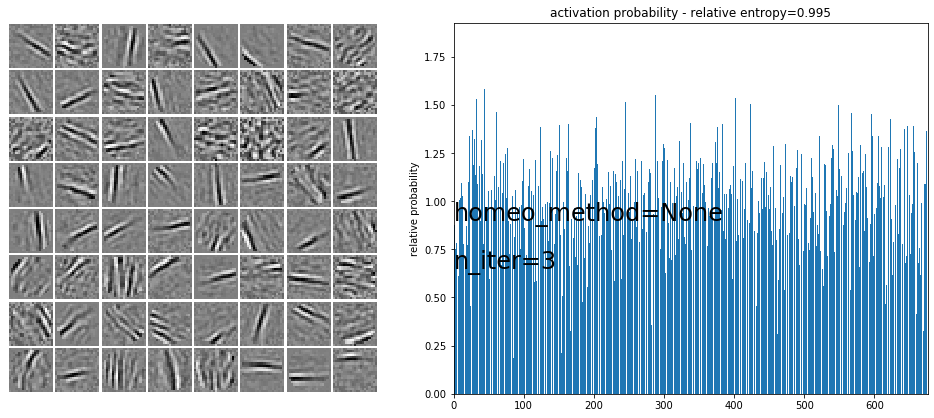

==> i_iter=3 / n_iter=5


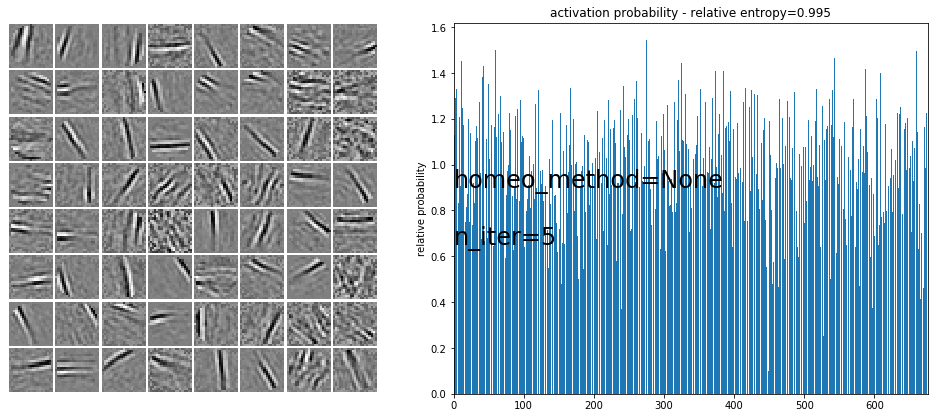

==> i_iter=4 / n_iter=7


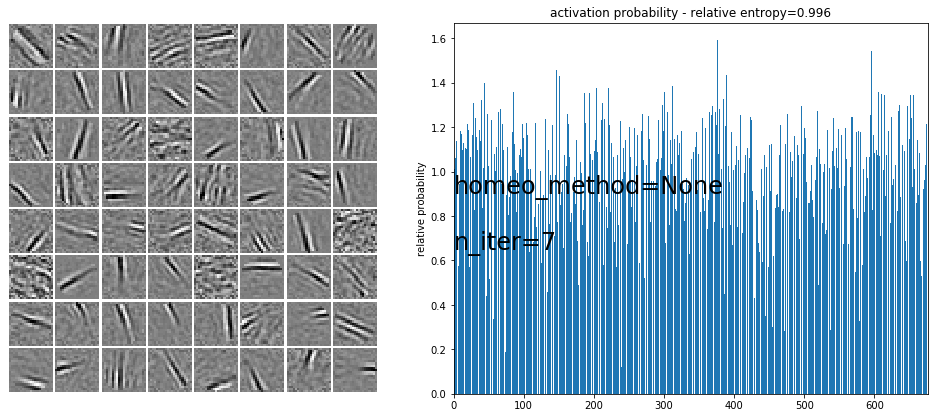

==> i_iter=5 / n_iter=12


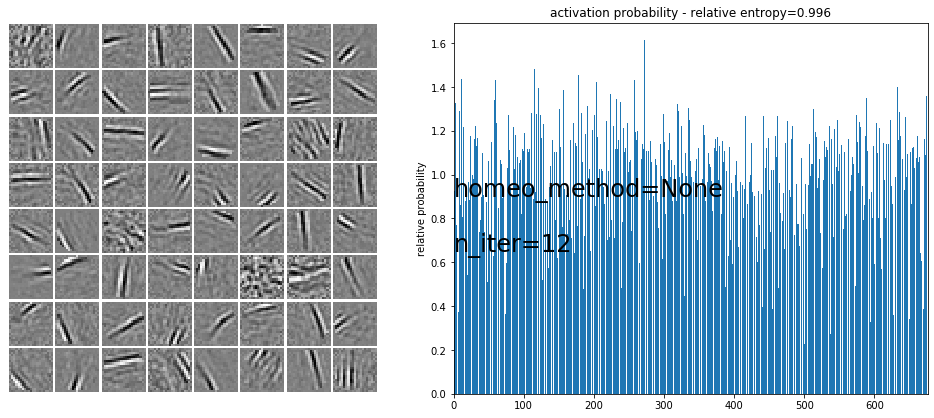

==> i_iter=6 / n_iter=18


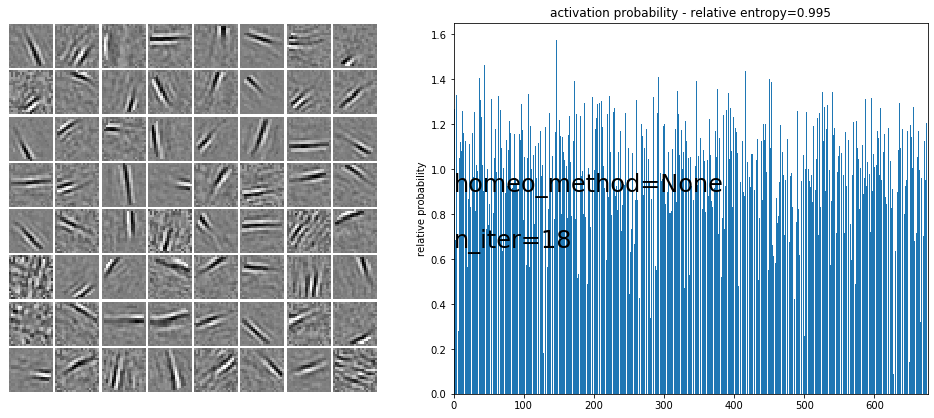

==> i_iter=7 / n_iter=30


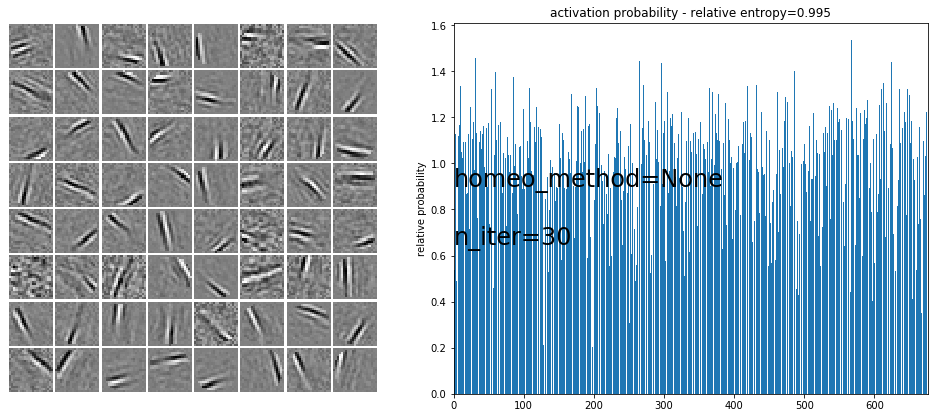

==> i_iter=8 / n_iter=47


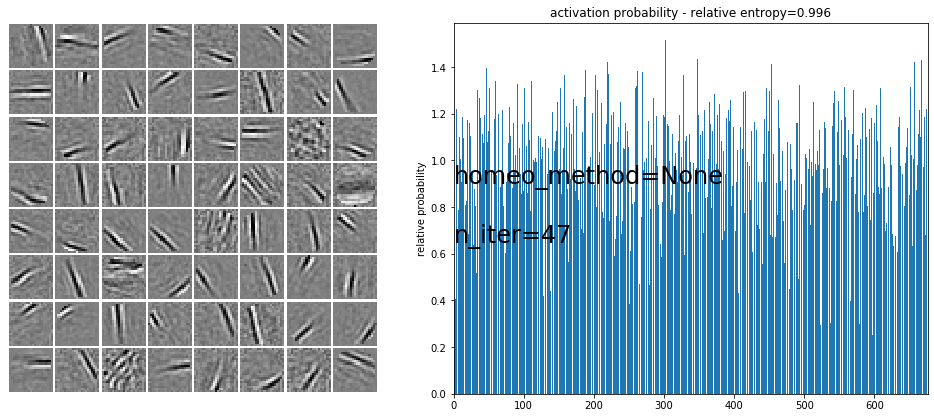

==> i_iter=9 / n_iter=77


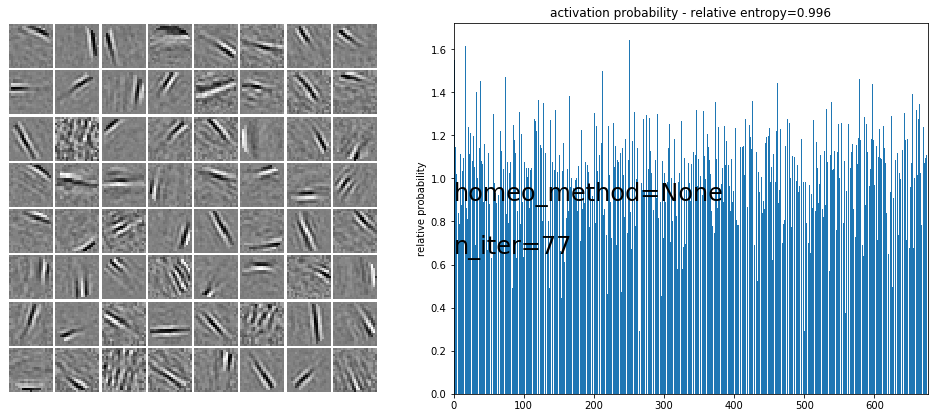

==> i_iter=10 / n_iter=123


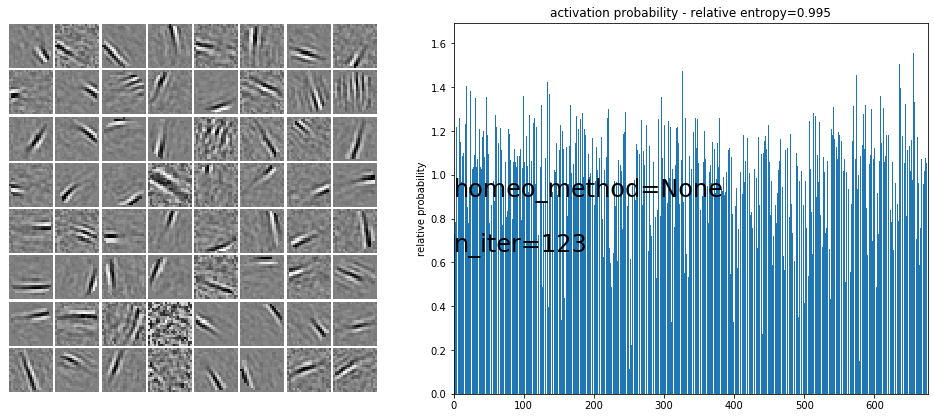

==> i_iter=11 / n_iter=200


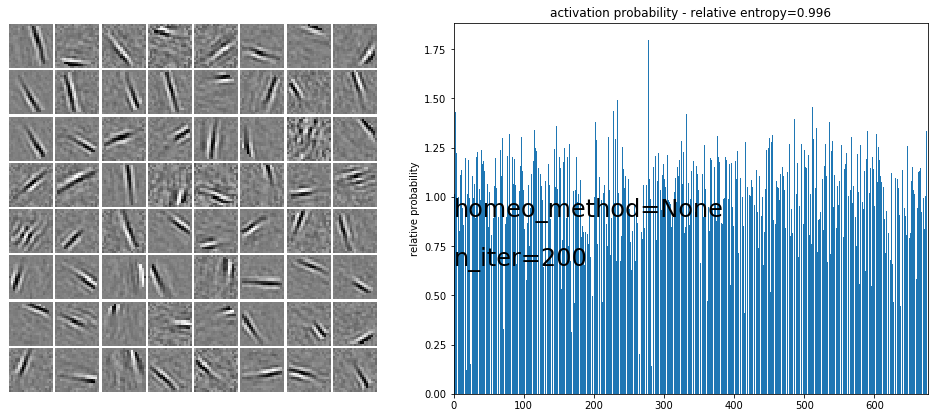

=> homeo_method=OLS
==> i_iter=0 / n_iter=2


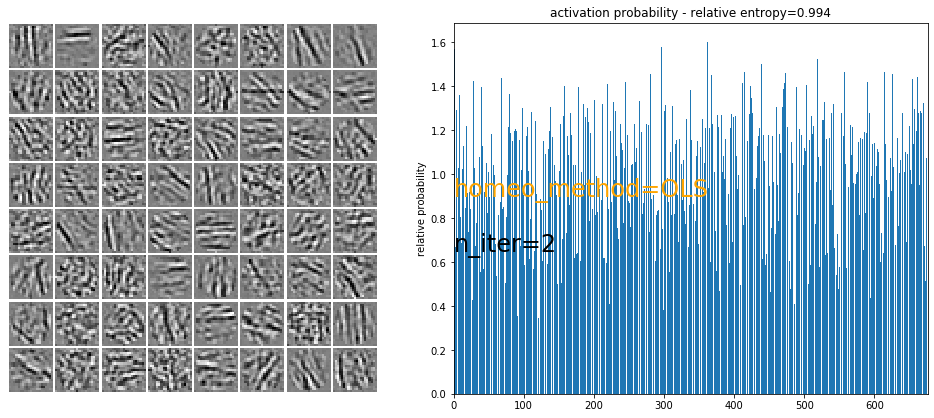

==> i_iter=1 / n_iter=2


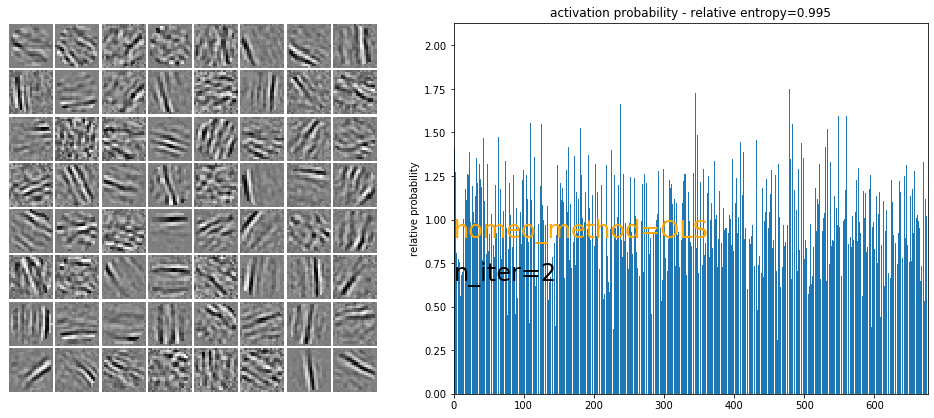

==> i_iter=2 / n_iter=3


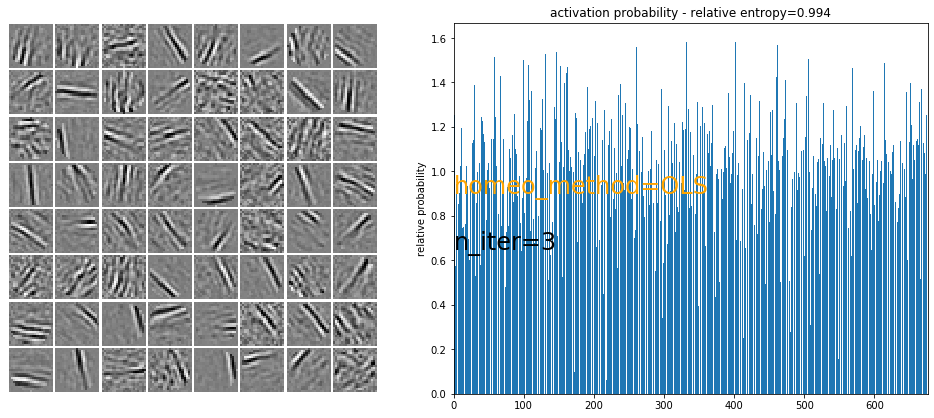

==> i_iter=3 / n_iter=5


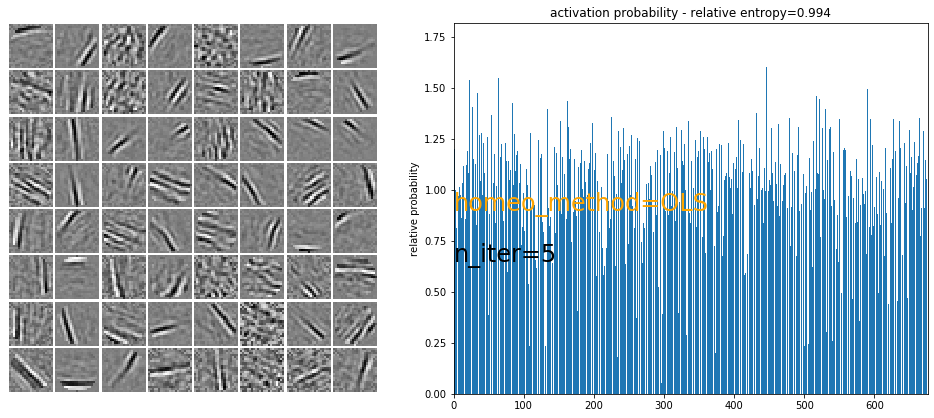

==> i_iter=4 / n_iter=7


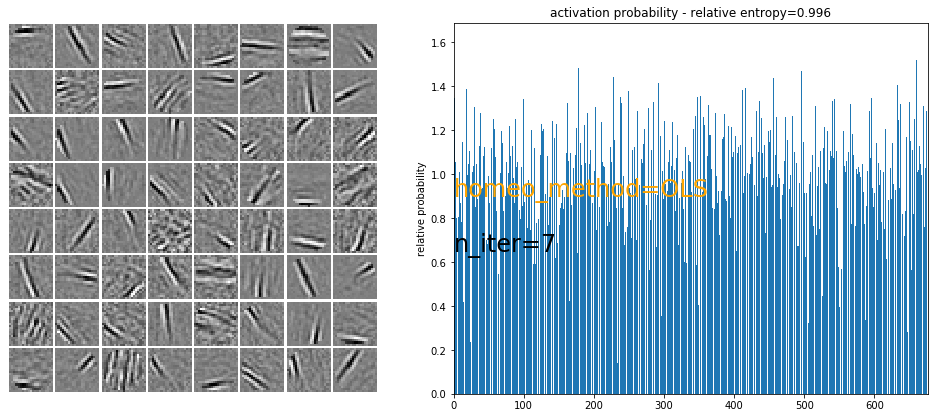

==> i_iter=5 / n_iter=12


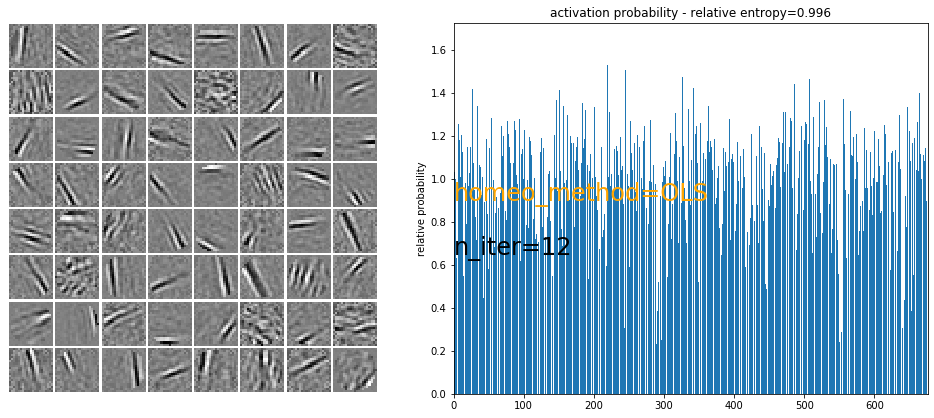

==> i_iter=6 / n_iter=18


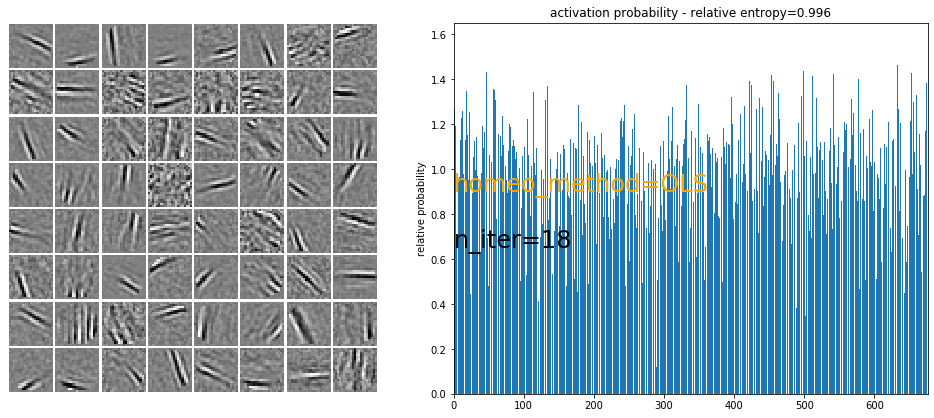

==> i_iter=7 / n_iter=30


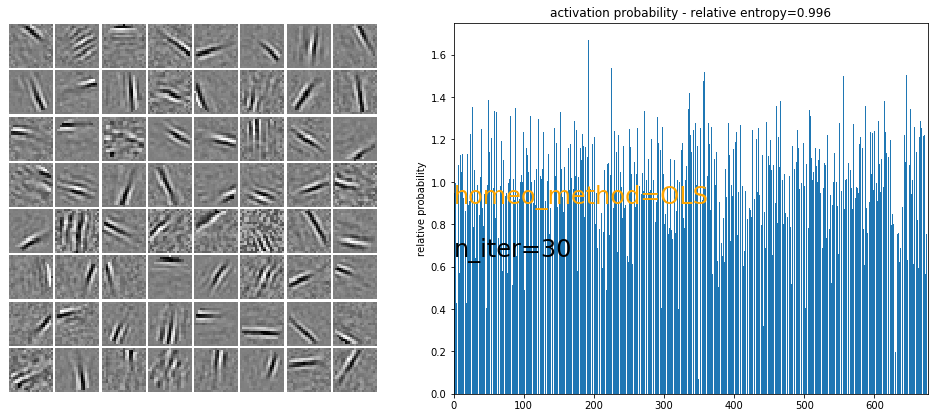

==> i_iter=8 / n_iter=47


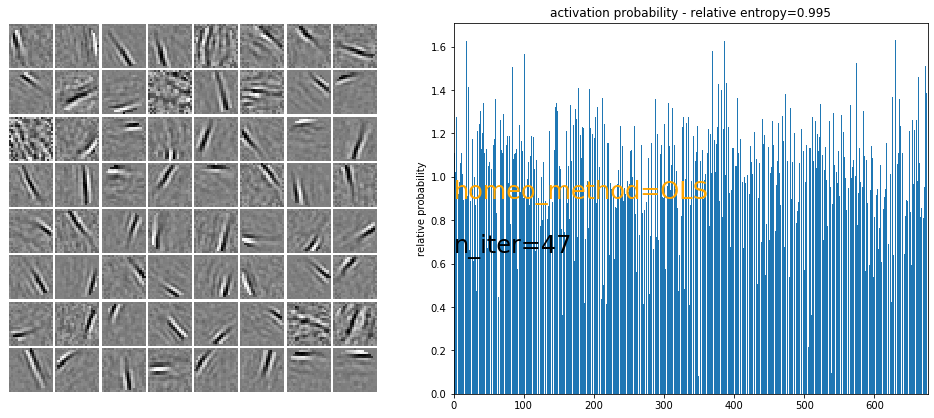

==> i_iter=9 / n_iter=77


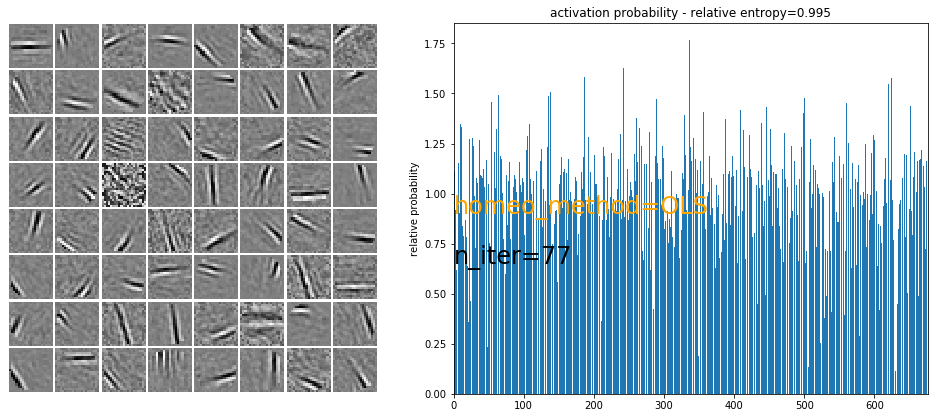

==> i_iter=10 / n_iter=123


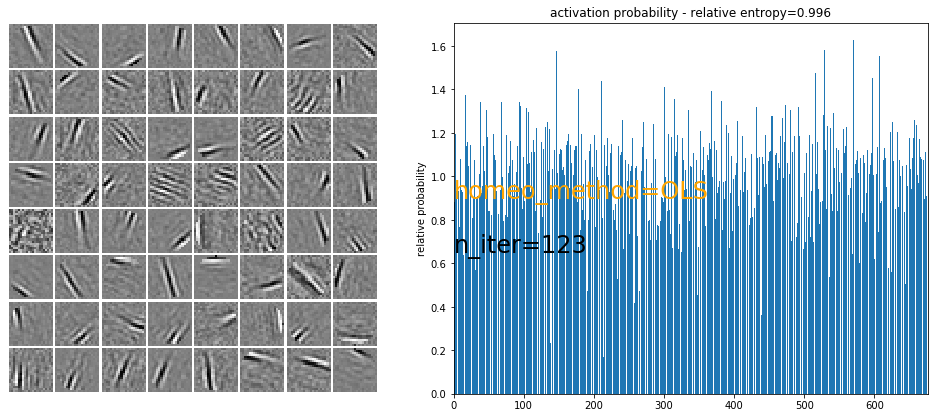

==> i_iter=11 / n_iter=200


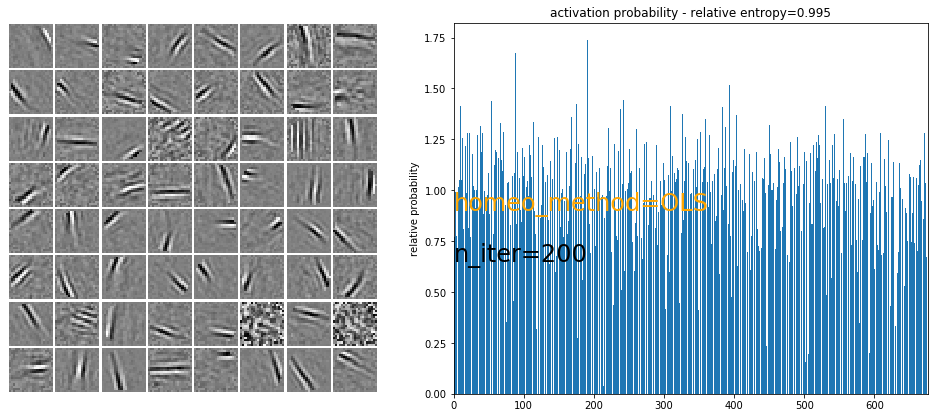

=> homeo_method=HEH
==> i_iter=0 / n_iter=2


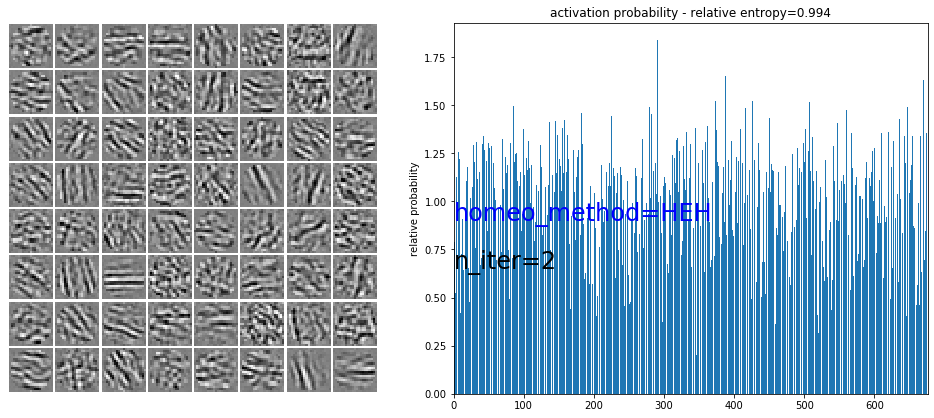

==> i_iter=1 / n_iter=2


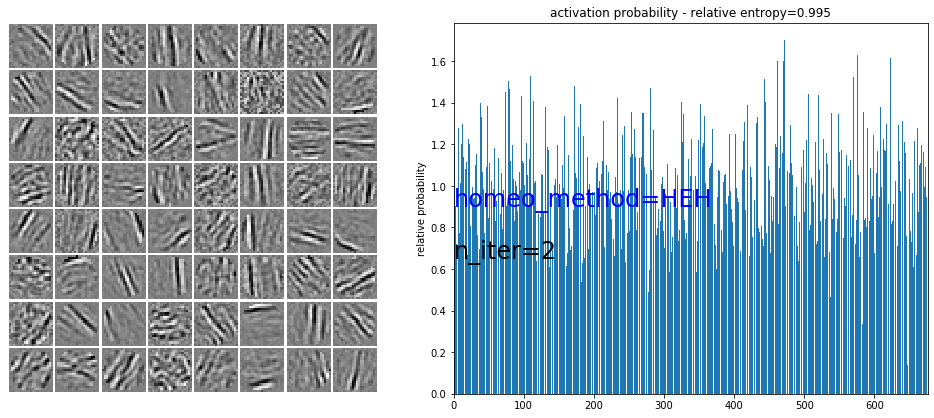

==> i_iter=2 / n_iter=3


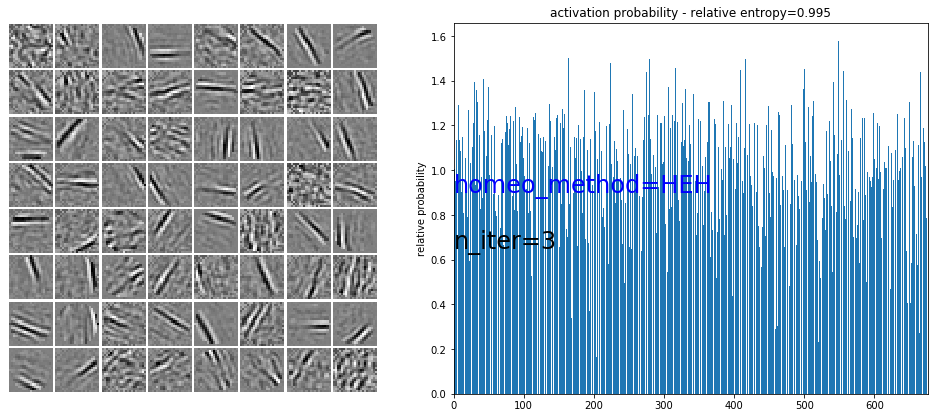

==> i_iter=3 / n_iter=5


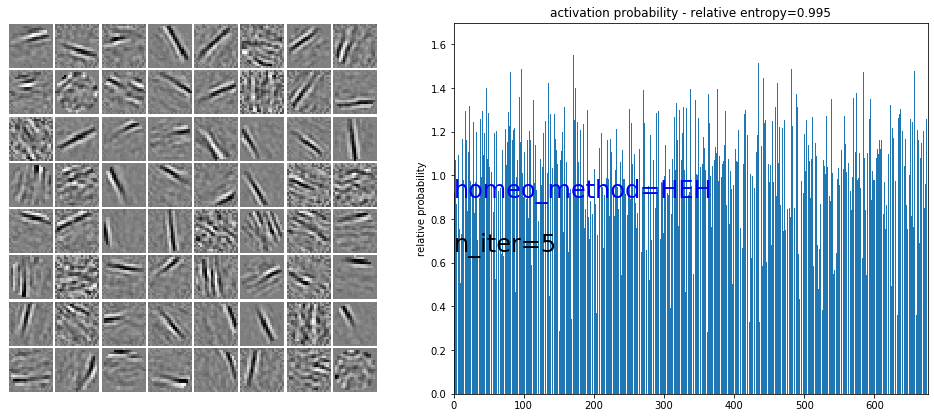

==> i_iter=4 / n_iter=7


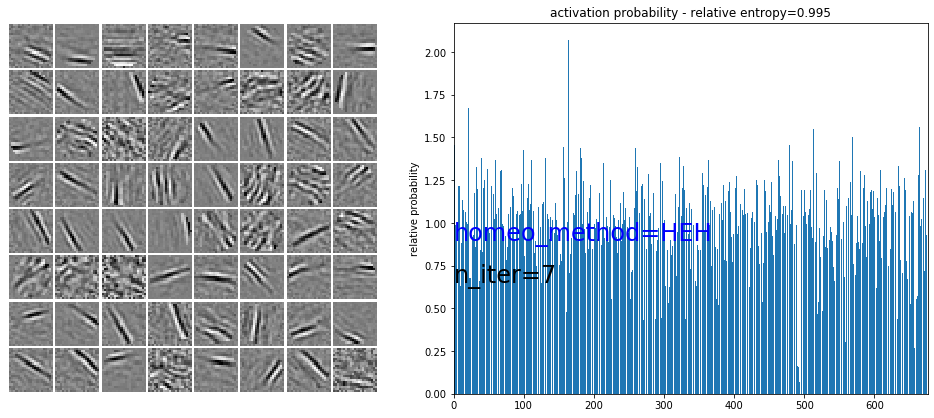

==> i_iter=5 / n_iter=12


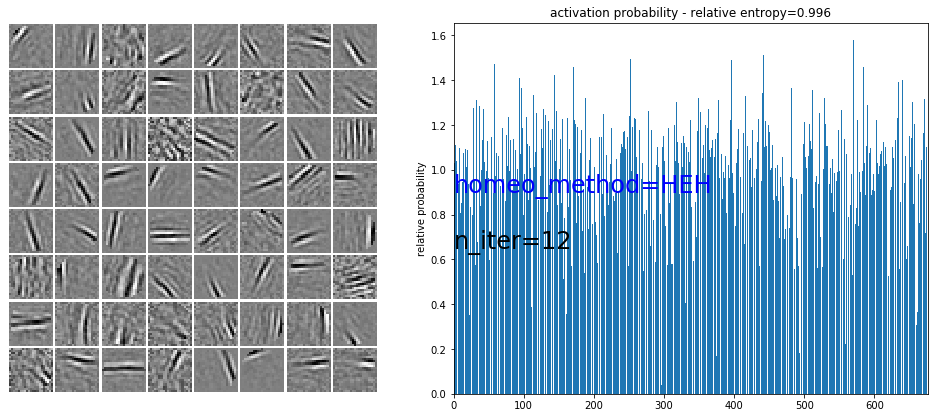

==> i_iter=6 / n_iter=18


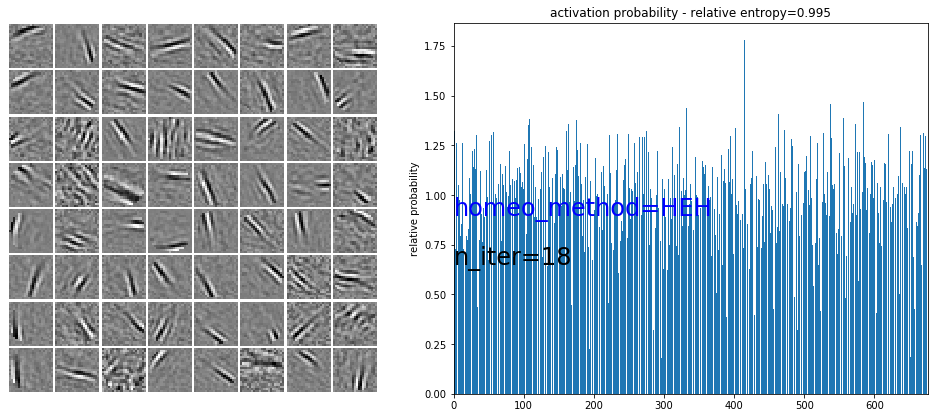

==> i_iter=7 / n_iter=30


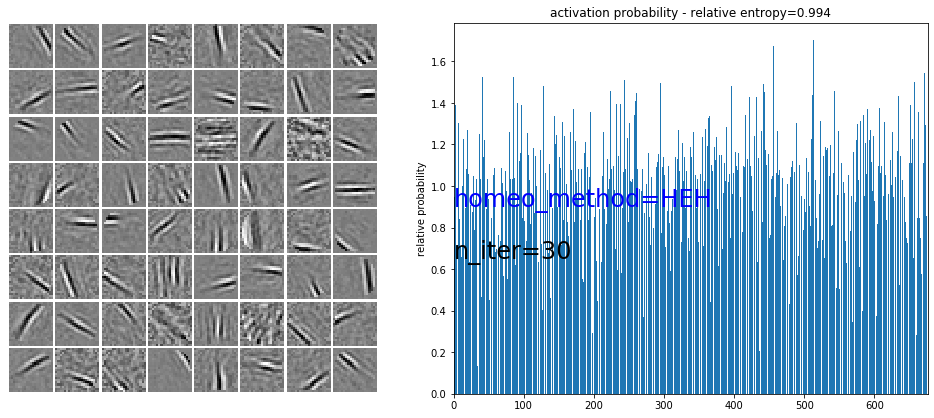

==> i_iter=8 / n_iter=47


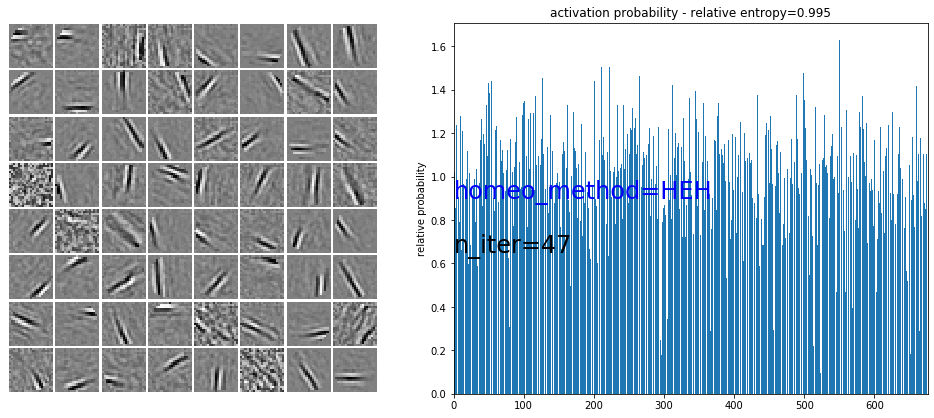

==> i_iter=9 / n_iter=77


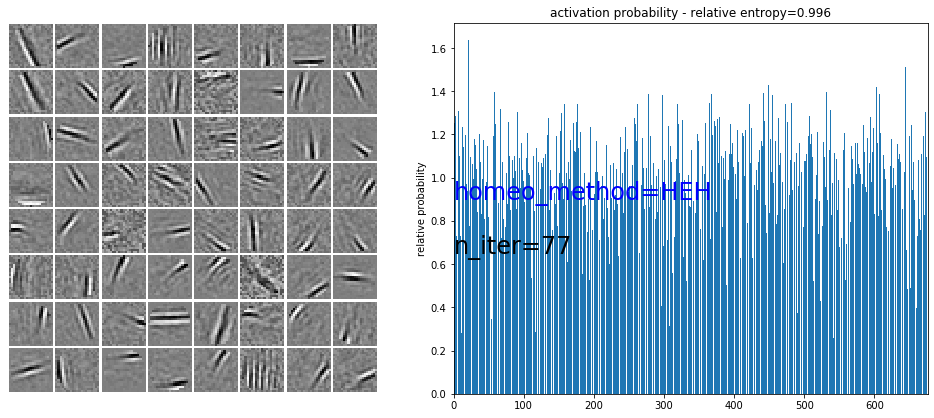

==> i_iter=10 / n_iter=123


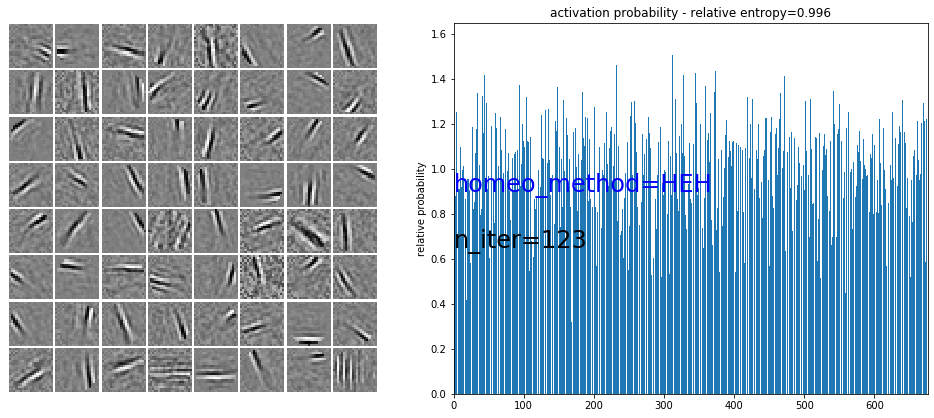

==> i_iter=11 / n_iter=200


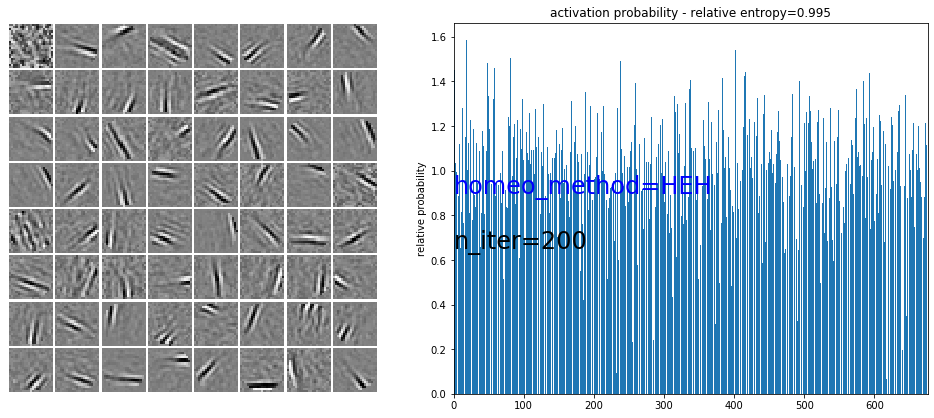

=> homeo_method=HAP
==> i_iter=0 / n_iter=2


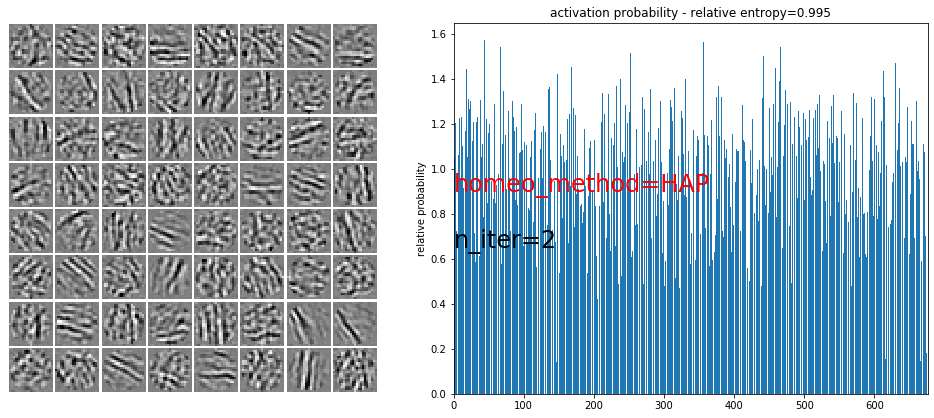

==> i_iter=1 / n_iter=2


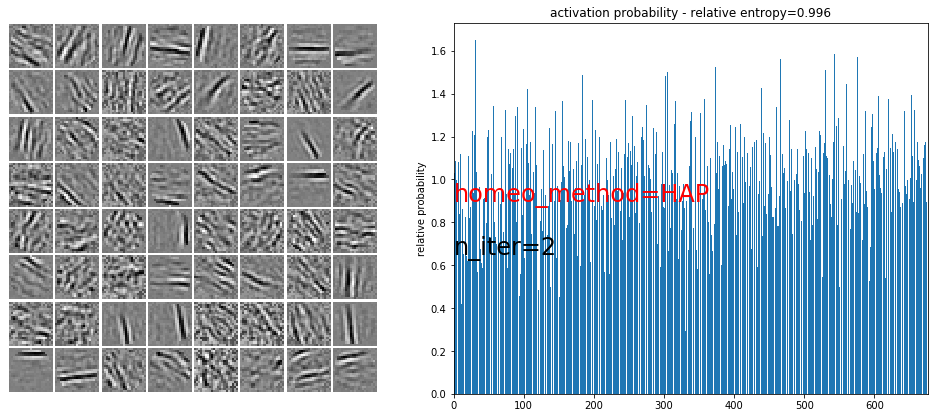

==> i_iter=2 / n_iter=3


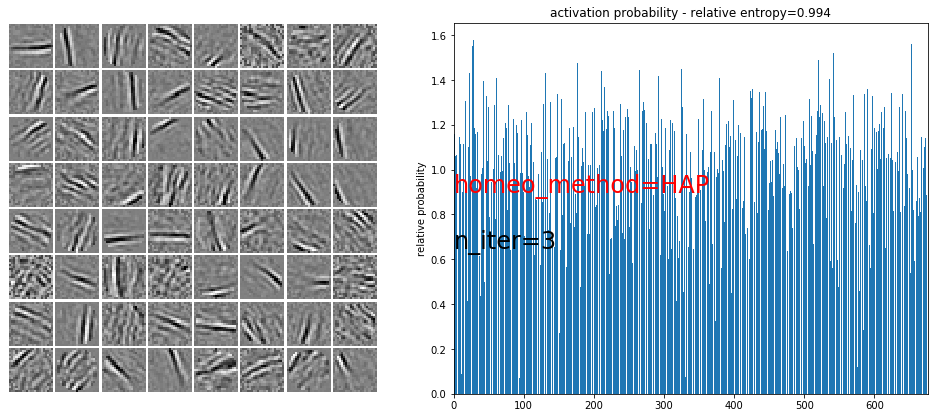

==> i_iter=3 / n_iter=5


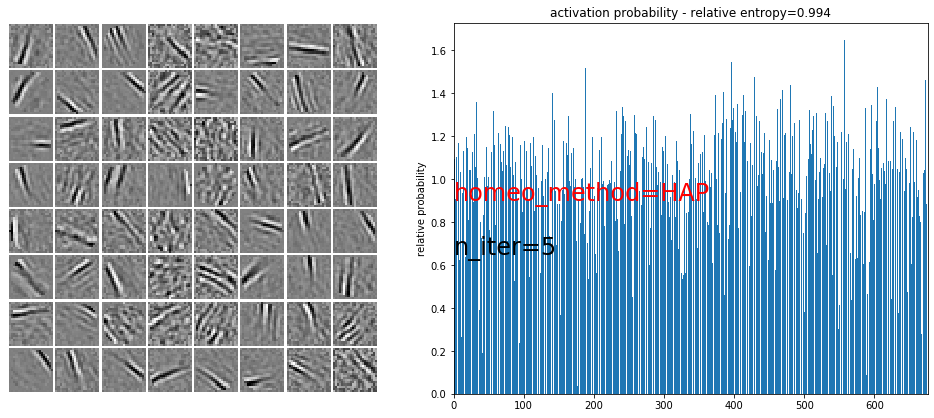

==> i_iter=4 / n_iter=7


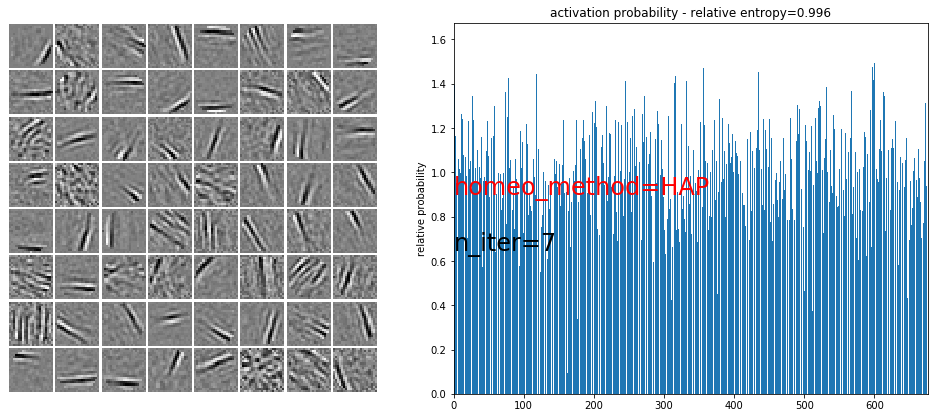

==> i_iter=5 / n_iter=12


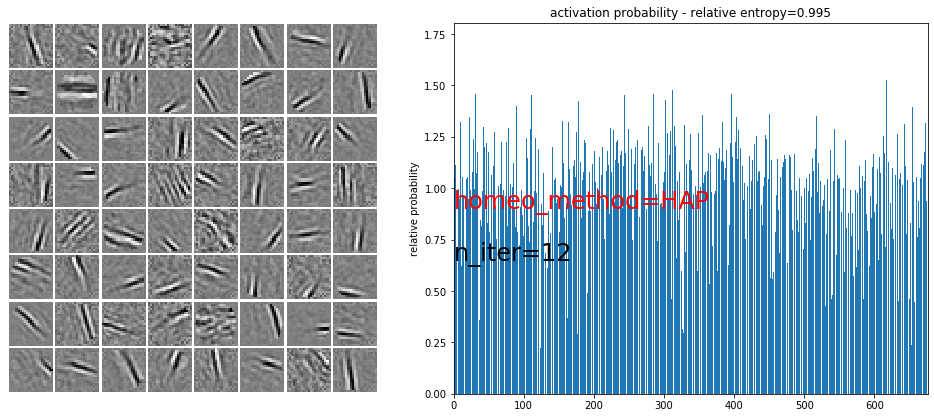

==> i_iter=6 / n_iter=18


In [ ]:
import matplotlib.pyplot as plt
def plot_dico(dico, color, dim_graph = (8, 8)):
    subplotpars = dict(left=0.05, right=.95, bottom=0.05, top=.95, wspace=0.05, hspace=0.05,)
    fig, axs = plt.subplots(1, 2, figsize=(fig_width, fig_width/(1+phi)), gridspec_kw=subplotpars)
    for ax in axs:
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        
    from shl_scripts import show_dico
    fig, axs[0] = show_dico(shl, dico, data=data, dim_graph=dim_graph, fig=fig, ax=axs[0], order=False)
    
    if False:
        from shl_scripts import plot_P_cum
        fig, axs[1] = plot_P_cum(dico.P_cum, ymin=0.6, ymax=1.001, 
                             title=None, suptitle=None, ylabel='non-linear functions', 
                             verbose=False, n_yticks=21, alpha=.02, c=color, fig=fig, ax=axs[1])
        axs[1].plot([0], [0], lw=1, color=color, label=homeo_method, alpha=.6)
    
    else:
        from shl_scripts import plot_proba_histogram
        coding = shl.code(data, dico)
        fig, axs[1] = plot_proba_histogram(coding, fig=fig, ax=axs[1])
        axs[1].plot([0], [0], lw=1, color=color, label=homeo_method, alpha=.6)
    # ax.set_ylabel(homeo_method)

    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
    #axs[1].legend(loc='lower right')
    return fig, axs

for homeo_method, color in zip(homeo_methods, colors):
    print(f'=> homeo_method={homeo_method}')

    for i_step in range(N_step):
        print(f'==> i_iter={i_step} / n_iter={n_iter}')
        figname = f'/tmp/{name}_{homeo_method}_{i_step}.png'
        if not os.path.isfile(figname):
            fig, axs = plot_dico(dico, color)
            axs[1].set_ylim(0. 1.7)
            axs[1].text(10, 0.1, f'homeo_method={homeo_method}', fontsize=24, color=color, rotation=0)#, backgroundcolor='white'
            axs[1].text(10, 1.5, f'n_iter={n_iter}', fontsize=24, color='k', rotation=0)#, backgroundcolor='white'
            plt.show()
            if dpi_export > 0 : fig.savefig(figname, dpi=dpi_export, bbox_inches='tight')

                          

Creating the movie using the (excellent) [MoviePy](http://zulko.github.io/moviepy/index.html) library:

In [39]:
[f'/tmp/{name}_{homeo_method}_{i_step}.png' for i_step in range(N_step)]

['/tmp/2019-09-11_Perrinet19_HAP_0.png',
 '/tmp/2019-09-11_Perrinet19_HAP_1.png',
 '/tmp/2019-09-11_Perrinet19_HAP_2.png',
 '/tmp/2019-09-11_Perrinet19_HAP_3.png',
 '/tmp/2019-09-11_Perrinet19_HAP_4.png',
 '/tmp/2019-09-11_Perrinet19_HAP_5.png',
 '/tmp/2019-09-11_Perrinet19_HAP_6.png',
 '/tmp/2019-09-11_Perrinet19_HAP_7.png',
 '/tmp/2019-09-11_Perrinet19_HAP_8.png',
 '/tmp/2019-09-11_Perrinet19_HAP_9.png',
 '/tmp/2019-09-11_Perrinet19_HAP_10.png',
 '/tmp/2019-09-11_Perrinet19_HAP_11.png']

In [42]:
vext = 'mp4'

from moviepy.editor import ImageSequenceClip

for homeo_method in homeo_methods:
    clip = ImageSequenceClip([f'/tmp/{name}_{homeo_method}_{i_step}.png' for i_step in range(N_step)], fps=2)
    clip.write_videofile(f'/tmp/{name}_{homeo_method}.{vext}')


                                                              
t:   7%|▋         | 2/30 [05:24<1:15:39, 162.12s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:12<1:12:57, 156.35s/it, now=None]

t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]

t:  17%|█▋        | 2/12 [00:00<00:00, 11.48it/s, now=None]

Moviepy - Building video /tmp/2019-09-11_Perrinet19_None.mp4.
Moviepy - Writing video /tmp/2019-09-11_Perrinet19_None.mp4





t:  25%|██▌       | 3/12 [00:00<00:01,  6.12it/s, now=None]

t:  33%|███▎      | 4/12 [00:00<00:01,  4.79it/s, now=None]

t:  42%|████▏     | 5/12 [00:01<00:01,  4.24it/s, now=None]

t:  50%|█████     | 6/12 [00:01<00:01,  3.92it/s, now=None]

t:  58%|█████▊    | 7/12 [00:01<00:01,  3.73it/s, now=None]

t:  67%|██████▋   | 8/12 [00:02<00:01,  3.59it/s, now=None]

t:  75%|███████▌  | 9/12 [00:02<00:00,  3.53it/s, now=None]

t:  83%|████████▎ | 10/12 [00:02<00:00,  3.49it/s, now=None]

t:  92%|█████████▏| 11/12 [00:02<00:00,  3.44it/s, now=None]

t: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s, now=None]

                                                              A
t:   7%|▋         | 2/30 [05:28<1:16:45, 164.49s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:17<1:14:04, 158.71s/it, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/2019-09-11_Perrinet19_None.mp4


                                                              
t:   7%|▋         | 2/30 [05:31<1:17:20, 165.73s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:19<1:14:38, 159.96s/it, now=None]

t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]

t:  17%|█▋        | 2/12 [00:00<00:00, 12.31it/s, now=None]

Moviepy - Building video /tmp/2019-09-11_Perrinet19_OLS.mp4.
Moviepy - Writing video /tmp/2019-09-11_Perrinet19_OLS.mp4





t:  25%|██▌       | 3/12 [00:00<00:01,  6.31it/s, now=None]

t:  33%|███▎      | 4/12 [00:00<00:01,  4.92it/s, now=None]

t:  42%|████▏     | 5/12 [00:01<00:01,  4.33it/s, now=None]

t:  50%|█████     | 6/12 [00:01<00:01,  3.97it/s, now=None]

t:  58%|█████▊    | 7/12 [00:01<00:01,  3.77it/s, now=None]

t:  67%|██████▋   | 8/12 [00:01<00:01,  3.65it/s, now=None]

t:  75%|███████▌  | 9/12 [00:02<00:00,  3.55it/s, now=None]

t:  83%|████████▎ | 10/12 [00:02<00:00,  3.49it/s, now=None]

t:  92%|█████████▏| 11/12 [00:02<00:00,  3.44it/s, now=None]

t: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s, now=None]

                                                              A
t:   7%|▋         | 2/30 [05:36<1:18:25, 168.05s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:24<1:15:43, 162.28s/it, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/2019-09-11_Perrinet19_OLS.mp4


                                                              
t:   7%|▋         | 2/30 [05:38<1:19:00, 169.31s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:27<1:16:18, 163.53s/it, now=None]

t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]

t:  17%|█▋        | 2/12 [00:00<00:00, 12.40it/s, now=None]

Moviepy - Building video /tmp/2019-09-11_Perrinet19_HEH.mp4.
Moviepy - Writing video /tmp/2019-09-11_Perrinet19_HEH.mp4





t:  25%|██▌       | 3/12 [00:00<00:01,  6.45it/s, now=None]

t:  33%|███▎      | 4/12 [00:00<00:01,  4.95it/s, now=None]

t:  42%|████▏     | 5/12 [00:01<00:01,  4.31it/s, now=None]

t:  50%|█████     | 6/12 [00:01<00:01,  3.93it/s, now=None]

t:  58%|█████▊    | 7/12 [00:01<00:01,  3.70it/s, now=None]

t:  67%|██████▋   | 8/12 [00:02<00:01,  3.56it/s, now=None]

t:  75%|███████▌  | 9/12 [00:02<00:00,  3.47it/s, now=None]

t:  83%|████████▎ | 10/12 [00:02<00:00,  3.41it/s, now=None]

t:  92%|█████████▏| 11/12 [00:02<00:00,  3.37it/s, now=None]

t: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s, now=None]

                                                              A
t:   7%|▋         | 2/30 [05:43<1:20:06, 171.67s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:31<1:17:25, 165.89s/it, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/2019-09-11_Perrinet19_HEH.mp4


                                                              
t:   7%|▋         | 2/30 [05:45<1:20:42, 172.95s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:34<1:18:00, 167.18s/it, now=None]

t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]

t:  17%|█▋        | 2/12 [00:00<00:00, 11.93it/s, now=None]

Moviepy - Building video /tmp/2019-09-11_Perrinet19_HAP.mp4.
Moviepy - Writing video /tmp/2019-09-11_Perrinet19_HAP.mp4





t:  25%|██▌       | 3/12 [00:00<00:01,  6.11it/s, now=None]

t:  33%|███▎      | 4/12 [00:00<00:01,  4.80it/s, now=None]

t:  42%|████▏     | 5/12 [00:01<00:01,  4.20it/s, now=None]

t:  50%|█████     | 6/12 [00:01<00:01,  3.88it/s, now=None]

t:  58%|█████▊    | 7/12 [00:01<00:01,  3.69it/s, now=None]

t:  67%|██████▋   | 8/12 [00:02<00:01,  3.56it/s, now=None]

t:  75%|███████▌  | 9/12 [00:02<00:00,  3.49it/s, now=None]

t:  83%|████████▎ | 10/12 [00:02<00:00,  3.45it/s, now=None]

t:  92%|█████████▏| 11/12 [00:02<00:00,  3.43it/s, now=None]

t: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s, now=None]

                                                              A
t:   7%|▋         | 2/30 [05:50<1:21:48, 175.32s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [05:39<1:19:07, 169.54s/it, now=None]

Moviepy - Done !
Moviepy - video ready /tmp/2019-09-11_Perrinet19_HAP.mp4


Annotating the movie using the (excellent) [MoviePy](http://zulko.github.io/moviepy/index.html) library:

In [81]:
from moviepy.editor import VideoFileClip, ImageClip, TextClip, CompositeVideoClip


H = 500
W = 800
SIZE = (W, H)


#clip = [VideoFileClip(f'/tmp/{name}_{homeo_method}.{vext}')]
clip = []
t = 0 
texts = ["An Adaptive Homeostatic Algorithm\n for the Unsupervised Learning\n of Visual Features",
         "as published Sep 2019\n in the journal Vision"
        ]
colors_intro = ['orange', 'white']

txt_opts = dict(fontsize=50, font="Amiri-Bold", stroke_color='gray', stroke_width=.5, size=(W,H))
duration = 3
for text, color in zip(texts, colors_intro):
    txt_clip = TextClip(text, color=color, **txt_opts)
    txt_clip = txt_clip.set_start(t).set_pos('center').set_duration(duration)#.resize(height=H, width=W)
    
    t += duration
    clip.append(txt_clip)
    

In [74]:
colors

['black', 'orange', 'blue', 'red']

In [82]:
texts = ["No homeostasis", "Olshausen (1997)", "Histogram Equalization", "Activation Probability"]
subtitles = {}
subtitles['None'] = [
    'I show here the result of learning...',
    '... evolving with the number of iterations  ...',
    '... on the left the receptive fields (kernels) ...',
    '... by showing 64 randomly picked from the 661 cells ...',
    '... and on the right histogram of activation probability.',
    '... After some iterations, edge-like filters appear ...',
    '... but the histogram shows a desequilibrium in the ...',
    '... activation probability, even though  ...',
    '... the norm of the kerenals are normalized.',
]
subtitles['OLS'] = [
    'The original homeostasis algorithm developped ...',
    '... by Olshausen and Field (1997) included a more  ...',
    '... elaborated adaptation based on the variance of ...',
    '... the coefficients, yielding a better balance...',
    '...  ...',
    'Still, this causes an under-optimisation of the ... ',
    '... sparse code as some are a priori ...',
    '... more likely to be selected than ...',
    '... others ...',
]
subtitles['HEH'] = [
    'Such an objective can be simply optimzed...',
    '... by introducing an adaptive non-linearity in our ...',
    '... sparse coding algorithm. This non-linearity  ...',
    '... is based on the concept of histogram normalization ...',
    '... to make sure that all neurons are always picked up.',
    '...  with a priori the same probability ...',
    '... We called this Histogram Equalization Homeostasis ...',
    '... and it effectively works very well, as well ...',
    '... qualitatively (left) than quantitatively (right).',
]
subtitles['HAP'] = [
    'A problem of Histogram Equalization Homeostasis ...',
    '... is that it is computationally more expensive  ...',
    '... and less plausible to be implemented in real ...',
    '...  biological neurons. We thus explored another...',
    '... algorithm simply based on the activation probability.',
    'This Homeostasis on the Activation Probability  ... ',
    '... performed qualitatively as well as HEH ...',
    '... and also quantitatively similarly ...',
    'Yet it comes at a very low cost compatible with biomimetic algorithms',
]

txt_opts = dict(fontsize=20, font="Amiri-Bold", stroke_color='gray', stroke_width=.5, size=(W,H))
for homeo_method, text, color in zip(homeo_methods, texts, colors):
    print(f'=> homeo_method={homeo_method}')
    duration = 1
    txt_clip = TextClip(text, color=color, **txt_opts)
    txt_clip = txt_clip.set_start(t).set_pos('center').set_duration(duration)
    t += duration
    clip.append(txt_clip)
    
    #clip = [VideoFileClip(f'{name}_{homeo_method}.{vext}')]
    
    for i_step in range(N_step):
        duration = 1
        im_clip = ImageClip(f'/tmp/{name}_{homeo_method}_{i_step}.png')
        im_clip = im_clip.set_start(t).set_duration(duration)
        t += duration
        clip.append(im_clip)

=> homeo_method=None
=> homeo_method=OLS
=> homeo_method=HEH
=> homeo_method=HAP


In [83]:
print(homeo_methods, texts, colors)
for homeo_method, text, color in zip(homeo_methods, texts, colors):
    print(homeo_method, text, color)

['None', 'OLS', 'HEH', 'HAP'] ['No homeostasis', 'Olshausen (1997)', 'Histogram Equalization', 'Activation Probability'] ['black', 'orange', 'blue', 'red']
None No homeostasis black
OLS Olshausen (1997) orange
HEH Histogram Equalization blue
HAP Activation Probability red


In [84]:
texts = ["... find more info, and open-sourced code @ ",
    "https://laurentperrinet.github.io/publication/perrinet-19"]

txt_opts = dict(fontsize=50, font="Amiri-Bold", stroke_color='gray', stroke_width=.5, size=(W,H))
duration = 3
for text, color in zip(texts, colors):
    txt_clip = TextClip(text, color=color, **txt_opts)
    txt_clip = txt_clip.set_start(t).set_pos('center').set_duration(duration)
    t += duration
    clip.append(txt_clip)
      

In [85]:
clip

In [86]:
      
# Overlay the text clip on the first video clip
video = CompositeVideoClip(clip)

# Write the result to a file (many options available !)
video.write_videofile(f'../files/{name}.{vext}', fps=5)

                                                              
t:   7%|▋         | 2/30 [30:08<7:01:52, 904.01s/it, now=None]
                                                              
t:   7%|▋         | 2/30 [29:56<6:59:10, 898.24s/it, now=None]

t:   0%|          | 0/320 [00:00<?, ?it/s, now=None]

t:   1%|          | 3/320 [00:00<00:12, 26.18it/s, now=None]

Moviepy - Building video ../files/2019-09-11_Perrinet19.mp4.
Moviepy - Writing video ../files/2019-09-11_Perrinet19.mp4





t:   2%|▎         | 8/320 [00:00<00:10, 29.82it/s, now=None]

t:   4%|▍         | 13/320 [00:00<00:09, 33.64it/s, now=None]

t:   6%|▌         | 18/320 [00:00<00:08, 37.00it/s, now=None]

t:   7%|▋         | 23/320 [00:00<00:07, 39.88it/s, now=None]

t:   9%|▉         | 28/320 [00:00<00:06, 42.29it/s, now=None]

t:  10%|█         | 33/320 [00:00<00:06, 44.04it/s, now=None]

t:  12%|█▏        | 38/320 [00:00<00:06, 44.84it/s, now=None]

t:  13%|█▎        | 43/320 [00:00<00:06, 45.46it/s, now=None]

t:  15%|█▌        | 48/320 [00:01<00:05, 45.49it/s, now=None]

t:  17%|█▋        | 53/320 [00:01<00:05, 45.86it/s, now=None]

t:  18%|█▊        | 58/320 [00:01<00:05, 45.64it/s, now=None]

t:  20%|█▉        | 63/320 [00:01<00:05, 45.73it/s, now=None]

t:  21%|██▏       | 68/320 [00:01<00:05, 45.97it/s, now=None]

t:  23%|██▎       | 73/320 [00:01<00:05, 46.15it/s, now=None]

t:  24%|██▍       | 78/320 [00:01<00:05, 45.73it/s, now=None]

t:  26%|██▌       | 83/320 [00:01<00:05, 45.58it/s, no

Moviepy - Done !
Moviepy - video ready ../files/2019-09-11_Perrinet19.mp4


In [37]:
%pwd


'/Users/laurentperrinet/pool/blog/laurentperrinet.github.io_sciblog/posts'

## some book keeping for the notebook


<BR>
<center><video controls autoplay loop src="../files/2019-09-11_Perrinet19.mp4" width=61.8%/> </center>
<BR>


In [ ]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, MotionClouds